/tmp/ipykernel_144/3229675868.py:36: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x= 'Variable1', y='Correlation', data=df_filtered, inner="point", scale='width')


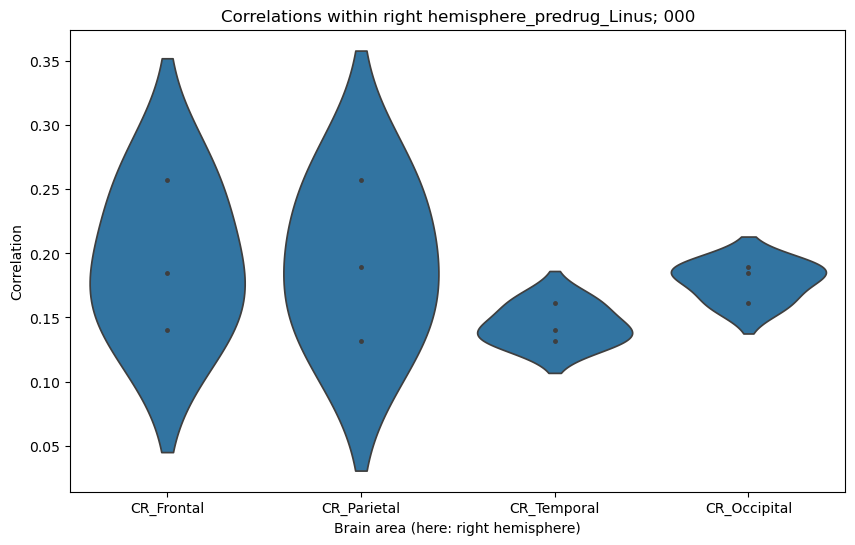

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("diagrams/violin", exist_ok=True)

file_predrug = 'correlation_files/csv_tables/correlation_matrix_long_format_predrug.csv'
file_postdrug = 'correlation_files/csv_tables/correlation_matrix_long_format_postdrug.csv'

# Please insert which hemisphere and session you are analyzing
hemisphere = 'right'  # Change to 'left' as needed
session = 'predrug'   # Change to 'postdrug' as needed

#Please insert with which file you are working from run_30 (prefix number)
prefix_number = '000'

#Please insert with which subject data you are working
subject = 'Linus'

# Load appropriate file
file = file_predrug if session == 'predrug' else file_postdrug
df = pd.read_csv(file)

# Define filter prefix based on hemisphere
prefix = 'CR_' if hemisphere == 'right' else 'CL_'

# Filter the data
df_filtered = df[(df['Variable1'].str.startswith(prefix)) &
                 (df['Variable2'].str.startswith(prefix)) &
                 (df['Correlation'] != 1)].dropna(subset=['Correlation'])

# Generate violin diagram
plt.figure(figsize=(10, 6))
sns.violinplot(x= 'Variable1', y='Correlation', data=df_filtered, inner="point", scale='width')

# Customize diagram
plt.title(f'Correlations within {hemisphere} hemisphere_{session}_{subject}; {prefix_number}')
plt.xlabel(f'Brain area (here: {hemisphere} hemisphere)')
plt.ylabel('Correlation')
plt.savefig(f"diagrams/violin/Correlation_within_{hemisphere}_hemisphere_{session}_{subject}_{prefix_number}.png", dpi=300, bbox_inches='tight')
plt.show()
